In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
data = pd.read_csv('data/BankChurners.csv')

In [3]:
# Check the ratio of existing customers and attrited(churned) customers
churn_ratio_df = data.groupby(['Attrition_Flag'])[
    ['CLIENTNUM']].count().reset_index()

churn_by_gender = data.groupby(['Attrition_Flag', 'Gender'])[['CLIENTNUM']].count(
).reset_index().sort_values(['Attrition_Flag', 'CLIENTNUM'], ascending=False)

churn_by_income = data.groupby(['Attrition_Flag', 'Income_Category'])[['CLIENTNUM']].count(
).reset_index().sort_values(['Attrition_Flag', 'CLIENTNUM'], ascending=False)

existing_customer_income = churn_by_income[churn_by_income['Attrition_Flag']
                                           == 'Existing Customer']

churned_customer_income = churn_by_income[churn_by_income['Attrition_Flag']
                                          == 'Attrited Customer']

churn_by_education = data.groupby(['Attrition_Flag', 'Education_Level'])[['CLIENTNUM']].count(
).reset_index().sort_values(['Attrition_Flag', 'CLIENTNUM'], ascending=False)

existing_customer_education = churn_by_education[churn_by_education['Attrition_Flag']
                                                 == 'Existing Customer']

churned_customer_education = churn_by_education[churn_by_education['Attrition_Flag']
                                                == 'Attrited Customer']

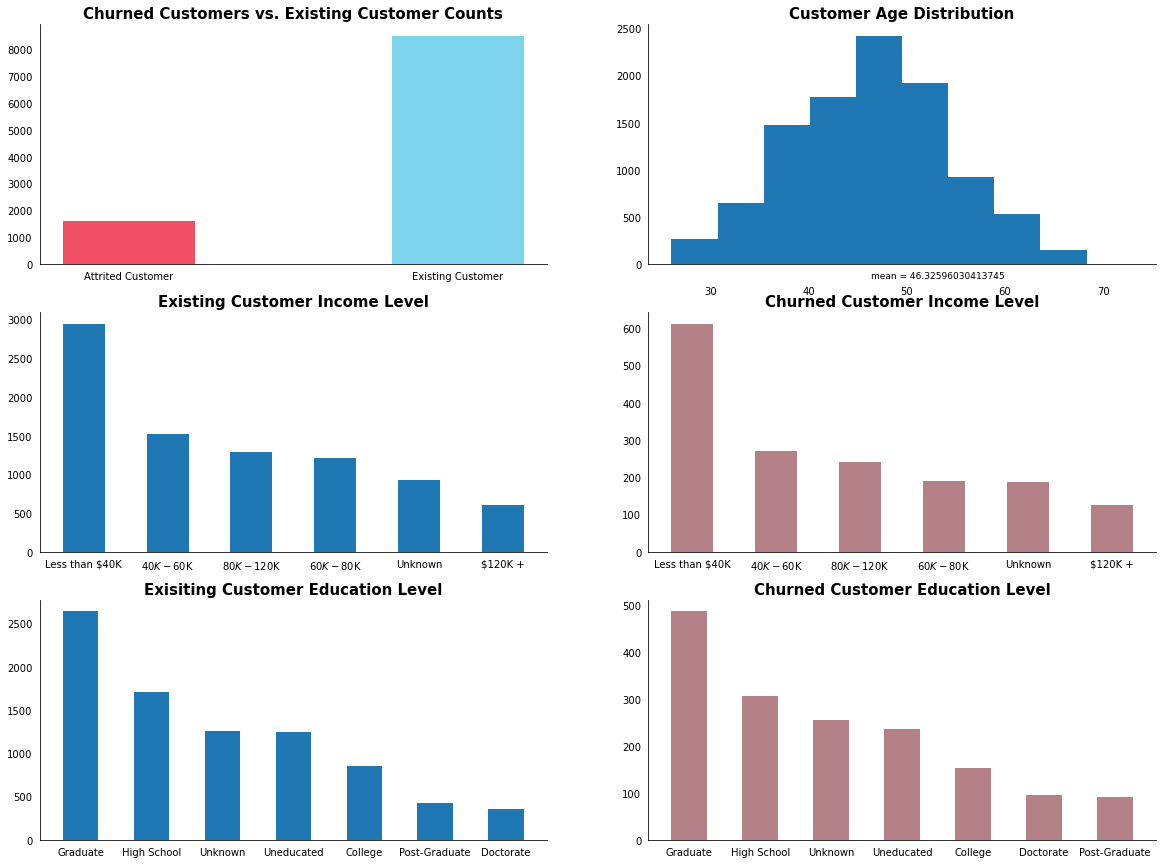

In [4]:
# Visualize the ratio
#fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,15))

mx = data['Customer_Age'].mean()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
axes = axes.flatten()

axes[0].bar(churn_ratio_df['Attrition_Flag'],
            churn_ratio_df['CLIENTNUM'], color=['#f04f65', '#7ed3ed'], width=0.4)
axes[0].set_title(
    'Churned Customers vs. Existing Customer Counts', fontweight='bold', size=15)

axes[1].hist(data['Customer_Age'])
axes[1].set_title('Customer Age Distribution', fontweight='bold', size=15)
axes[1].text(mx, -150, f"mean = {mx}", fontsize=9)
axes[1].tick_params(axis='x', pad=18)

axes[2].bar(existing_customer_income['Income_Category'],
            existing_customer_income['CLIENTNUM'], width=0.5)
axes[2].set_title('Existing Customer Income Level', fontweight='bold', size=15)

axes[3].bar(churned_customer_income['Income_Category'],
            churned_customer_income['CLIENTNUM'], color='#b58188', width=0.5)
axes[3].set_title('Churned Customer Income Level', fontweight='bold', size=15)

axes[4].bar(existing_customer_education['Education_Level'],
            existing_customer_education['CLIENTNUM'], width=0.5)
axes[4].set_title('Exisiting Customer Education Level',
                  fontweight='bold', size=15)

axes[5].bar(churned_customer_education['Education_Level'],
            churned_customer_education['CLIENTNUM'], color='#b58188', width=0.5)
axes[5].set_title('Churned Customer Education Level',
                  fontweight='bold', size=15)

for i in range(6):
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].yaxis.set_ticks_position('none')
    axes[i].xaxis.set_ticks_position('none')

From the visualizations above, the dataset is imbalanced. Churned customer count is much smaller then exisiting cosutomer count.